Image classification using CNN and CIFAR-10 dataset

Import libraries

In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import seaborn as sns
sns.set()

Load datasets

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Set labels and display images

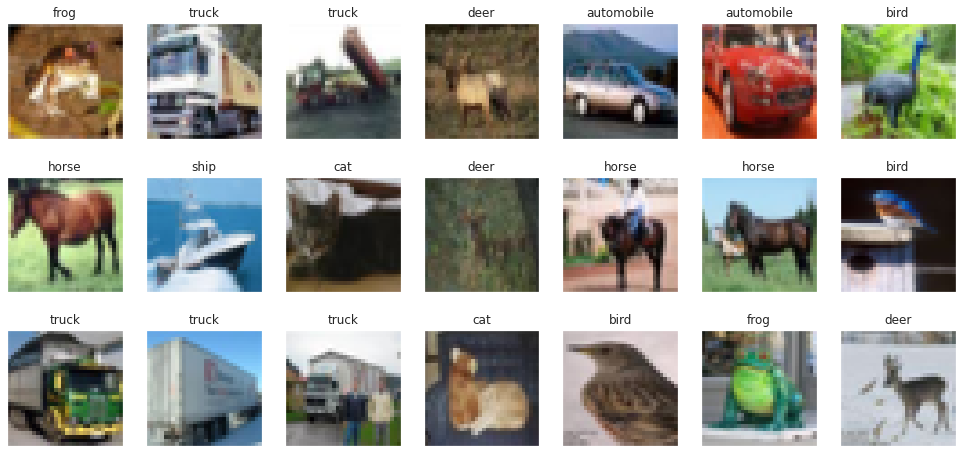

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i, j].set_title(labels[y_train[index][0]])
        axes[i, j].imshow(X_train[index])
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Preprocessing

In [4]:
#convert to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Value normalization
X_train = X_train/255.0
X_test = X_test/255.0

# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

Load pre-trained model

In [5]:
model= load_model('drive/MyDrive/project work(7th sem)/code/models/model-sgd-dr-b64-e100.h5')

OR Construct CNN model


In [ ]:
model= Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Show model summary

In [ ]:
print(model.summary())

Training the model

In [ ]:
batch_size=64
epochs=100
steps = int(X_train.shape[0] / batch_size)
#fit the model without image augmentation
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test))

# fit using image augmentation
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True, vertical_flip=False) 
# history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,validation_data=(X_test, y_test))

#save the model
model.save('drive/MyDrive/project work(7th sem)/code/models/model-sgd-dr-b64-e100.h5', overwrite=True)

634/782 [=======================>......] - ETA: 43s - loss: 1.4292 - accuracy: 0.4781

Print model accuracy

In [6]:
err, acc = model.evaluate(X_test, y_test, verbose=0)
print('test accuracy: > %.3f' % (acc * 100.0))
print('error rate: > %.3f' % (err * 100.0))


test accuracy: > 82.640
error rate: > 51.911


Show evaluation graphs

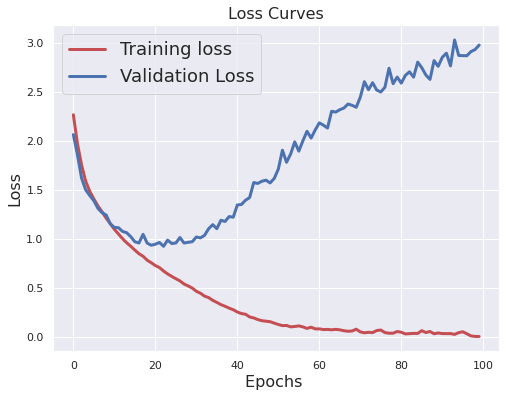

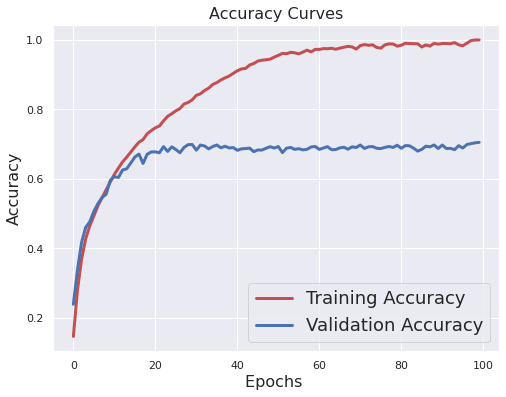

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('drive/MyDrive/project work(7th sem)/code/graphs/model-dr-aug-sgd-b64-e200_loss_curve.png')

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('drive/MyDrive/project work(7th sem)/code/graphs/model-sgd-dr-aug-b64-e200_accuracy_curve.png')


Predict and show confusion matrix

In [6]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

# plt.figure(figsize=(9, 9))
# sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels,
#             fmt='d', annot=True, cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# # plt.savefig('drive/MyDrive/colab/model-aug-sgd-b64-e100_cm.png')
# plt.show()

 Find TP,TN,FP,FN and calculate performance metrices

In [7]:
import numpy as np

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Error Rate
ER = (FP+FN)/(FP+FN+TP+TN)
# Accuracy rate
AR = (TP+TN)/(FP+FN+TP+TN)
#f1 score
F1 = (PPV*TPR)/(PPV+TPR)

#print total of all metrices
print('accuracy rate: > %.3f' % (AR.mean() * 100.0))
print('Error rate: > %.3f' % (ER.mean() * 100.0))
print('TPR rate: > %.3f' % (TPR.mean() * 100.0))
print('TNR rate: > %.3f' % (TNR.mean() * 100.0))
print('PPV rate: > %.3f' % (PPV.mean() * 100.0))
print('F1 rate: > %.3f' % (F1.mean() * 100.0))

accuracy rate: > 96.528
Error rate: > 3.472
TPR rate: > 82.640
TNR rate: > 98.071
PPV rate: > 82.961
F1 rate: > 41.320
